In [2]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from pathlib import Path
import xarray as xr
import easygems.healpix as egh
import pandas as pd

In [3]:
# Define the path to the Zarr dataset
# Open the Zarr store using xarray

zoom_levels = [3,4,5,6,7,8,9,10]
temp_res = 1

zoom = 3; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_3 = xr.open_zarr(path)

zoom = 4; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_4 = xr.open_zarr(path)

zoom = 5; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_5 = xr.open_zarr(path)

zoom = 6; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_6 = xr.open_zarr(path)

zoom = 7; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_7 = xr.open_zarr(path)

zoom = 8; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_8 = xr.open_zarr(path)

zoom = 9; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_9 = xr.open_zarr(path)

zoom = 10; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_10 = xr.open_zarr(path)


ds_dict = {3:ds_3.pr, 4:ds_4.pr, 5:ds_5.pr, 6:ds_6.pr, 7:ds_7.pr, 8:ds_8.pr, 9:ds_9.pr, 10:ds_10.pr}


In [4]:
# Get Healpix NSIDE
n_cells = len(ds_10['cell'])
nside = hp.npix2nside(n_cells)
print(n_cells, nside)

12582912 1024


In [5]:
# Get lat/lon of Healpix pixels
theta, phi = hp.pix2ang(nside, np.arange(n_cells))  # theta: colatitude, phi: longitude
lat_heal = np.degrees(0.5 * np.pi - theta)
lon_heal = np.degrees(phi)

In [12]:
# Get domain for Fiji 

# Create lat / lon arrays
lat = []
lon = []
#Suva (Manual)
lat_station = -18.147571
lon_station = 178.453610
lat.append(lat_station)
lon.append(lon_station)
#Suva (AWS)
lat_station = -18.147549
lon_station = 178.453608
lat.append(lat_station)
lon.append(lon_station)
#Lautoka (Manual)
lat_station = -17.618600
lon_station = 177.438900
lat.append(lat_station)
lon.append(lon_station)
#Lautoka (TB3)
lat_station = -17.618897
lon_station = 177.438730
lat.append(lat_station)
lon.append(lon_station)
#Penang (TB3)
lat_station = -17.373833
lon_station = 178.171619
lat.append(lat_station)
lon.append(lon_station)
#Savusavu (Airport)
lat_station = -16.806141
lon_station = 179.342817
lat.append(lat_station)
lon.append(lon_station)
#Labasa (Airport)
lat_station = -16.468900
lon_station = 179.339700
lat.append(lat_station)
lon.append(lon_station)

# Get boundary of points

margin = 0.0 # optional margin for the boundary

lon_min = min(lon)-margin
lon_max = max(lon)+margin
lat_min = min(lat)-margin
lat_max = max(lat)+margin
bounds = [lon_min, lon_max, lat_min, lat_max]
print(bounds)



[177.43873, 179.342817, -18.147571, -16.4689]


In [13]:
# Find pixels in bounding box
#in_box = (lon_min >= lon_heal) & (lon_max <= np.roll(lon_heal, 1)) & (lat_min >= lat_heal) & (lat_max <= np.roll(lat_heal, 1))
in_box = (lon_heal >= lon_min) & (lon_heal <= lon_max) & (lat_heal >= lat_min) & (lat_heal <= lat_max)
subset_cells = np.where(in_box)[0]
print("The number of cells in the domain = ", sum(in_box))

The number of cells in the domain =  946


In [14]:
# Subset the dataset for Fiji
ds_10_F = ds_10.sel(cell=subset_cells)
pr_10_F = ds_10_F.pr * 86400
# The cropped precipitation data for Fiji is pr_10_F
print(pr_10_F)

<xarray.DataArray 'pr' (time: 10489, cell: 946)> Size: 79MB
dask.array<mul, shape=(10489, 946), dtype=float64, chunksize=(1, 946), chunktype=numpy.ndarray>
Coordinates:
  * cell     (cell) int64 8kB 8077283 8077284 8077285 ... 8249335 8249336
    crs      float64 8B ...
  * time     (time) datetime64[ns] 84kB 2020-01-20 ... 2021-04-01


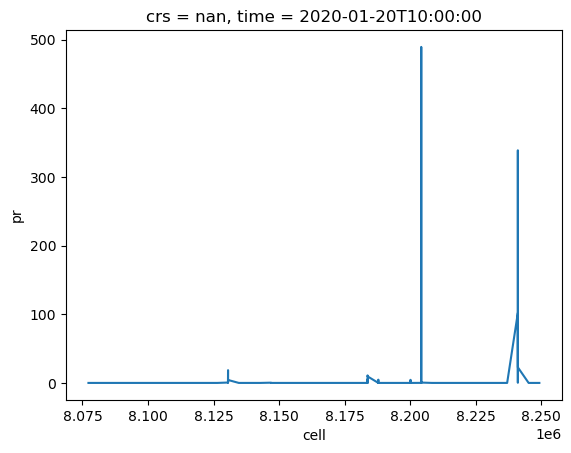

In [10]:
pr_10_F.isel(time=10).plot()